In [1]:
import os
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir(b'C:\\Users\\User\\Downloads')

#  **Count the number of lines**

In [3]:
def number_of_lines():
    handle=open('mbot.txt')
    read=handle.read()
    handle.close()
    count=0
    for line in read:
        if line=="\n":
            count+=1
    return count

In [4]:
print(number_of_lines())

1910


# **Count the Number of Subject Lines**

In [5]:
def count_number_of_lines():
    handle=open('mbot.txt')
    read=handle.read()
    lines=read.split()
    handle.close()
    counts=0
    for line in lines:
        if line.startswith('Subject:'):
            counts+=1
    return counts
    

In [6]:
print(count_number_of_lines())

27


# **Find Average Spam Confidence**

In [7]:
#0.7507185185185187
def average_spam_confidence():
    handle=open('mbot.txt','r')
    confi=[]
    tot=0.
    for line in handle:
        line=line.strip()
        if line.startswith("X-DSPAM-Confidence:"):
            l=line.split(':')
            confi.append(float(l[1]))
    handle.close()
    for i in confi:
        tot+=i

    avg=tot/len(confi)
    
    return avg

In [8]:
print(average_spam_confidence())

0.7507185185185187


# **Find Which Day of the Week the Email was sent**
 For those lines which start from "From", then look for the third word and keep a running 
 count of each of the days of the week. How do you find the day of the week, is an exercise for you.

In [9]:
def find_email_sent_days():
    handle=open('mbot.txt')
    d={}
    days=[]
    for line in handle:
        line=line.strip()
        if line.startswith("From"):
            l=line.split()
            if len(l)>3:
                days.append(l[2])
    handle.close()

    for i in days:
        if i in d:
            d[i]+=1
        else:
            d[i]=1
    return d

In [10]:
find_email_sent_days()

{'Sat': 1, 'Fri': 20, 'Thu': 6}

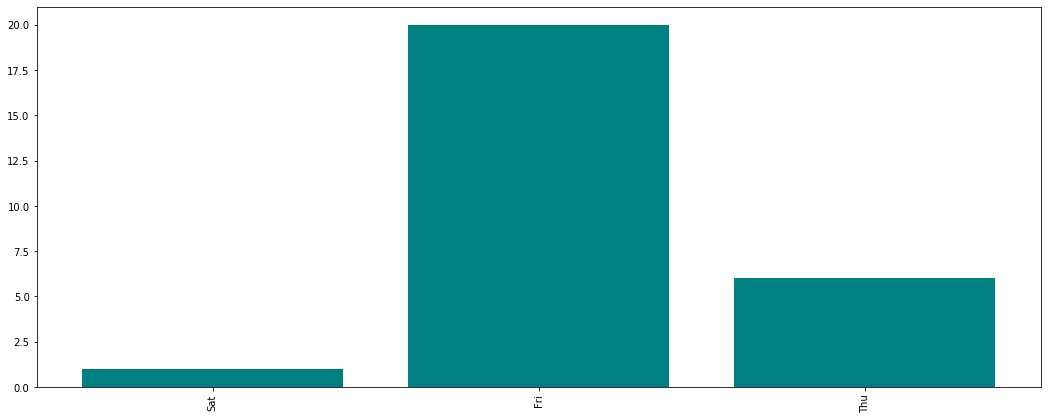

In [11]:
Dy=find_email_sent_days()
plt.figure(figsize=(18,7))
plt.bar(*zip(*Dy.items()),color='teal')
plt.xticks(rotation=90)
plt.show()

# **Count Number of Messages From Each Email Address**

In [12]:
def count_message_from_email():
    handle=open('mbot.txt')
    d={}
    email=[]
    for line in handle:
        line=line.strip()
        if line.startswith('From'):
            l=line.split()
            if len(l)>2:
                email.append(l[1])

    for i in email:
        if i in d:
            d[i]+=1
        else:
            d[i]=1
    return d

In [13]:
count_message_from_email()

{'stephen.marquard@uct.ac.za': 2,
 'louis@media.berkeley.edu': 3,
 'zqian@umich.edu': 4,
 'rjlowe@iupui.edu': 2,
 'cwen@iupui.edu': 5,
 'gsilver@umich.edu': 3,
 'wagnermr@iupui.edu': 1,
 'antranig@caret.cam.ac.uk': 1,
 'gopal.ramasammycook@gmail.com': 1,
 'david.horwitz@uct.ac.za': 4,
 'ray@media.berkeley.edu': 1}

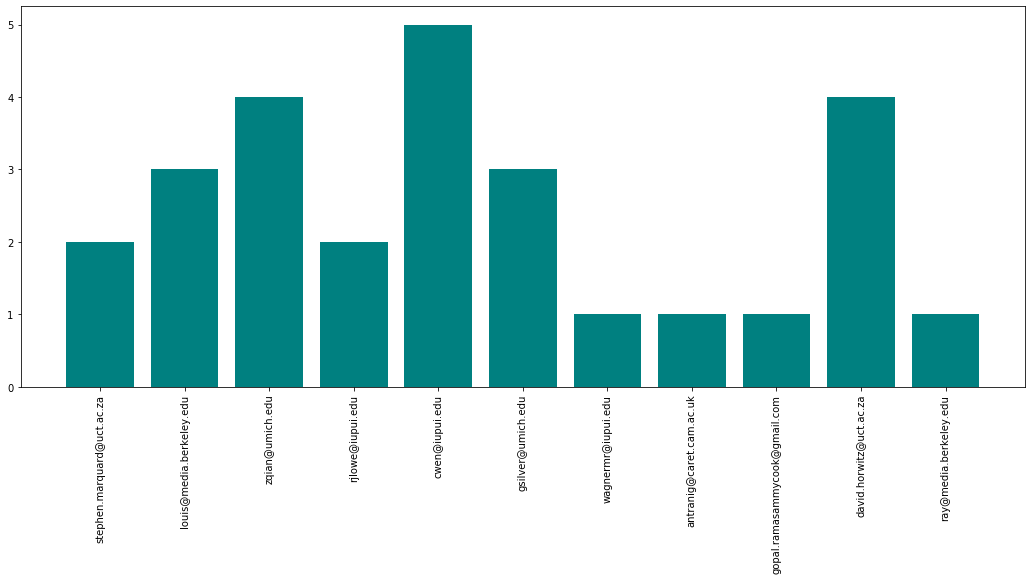

In [14]:
D=count_message_from_email()
plt.figure(figsize=(18,7))
plt.bar(*zip(*D.items()),color='teal')
plt.xticks(rotation=90)
plt.show()

# **Count Number of Messages From Each Domain**

In [15]:
def count_message_from_domain():
    handle=open('mbot.txt')
    d={}
    email=[]
    for line in handle:
        line=line.strip()
        if line.startswith('From'):
            l=line.split()
            if len(l)>2:
                email.append(l[1])
    dom=[]
    for i in email:
        l1=i.split('@')
        dom.append(l1[1])
    
    for k in dom:
        if k in d:
            d[k]+=1
        else:
            d[k]=1
    return d

In [16]:
 count_message_from_domain()

{'uct.ac.za': 6,
 'media.berkeley.edu': 4,
 'umich.edu': 7,
 'iupui.edu': 8,
 'caret.cam.ac.uk': 1,
 'gmail.com': 1}

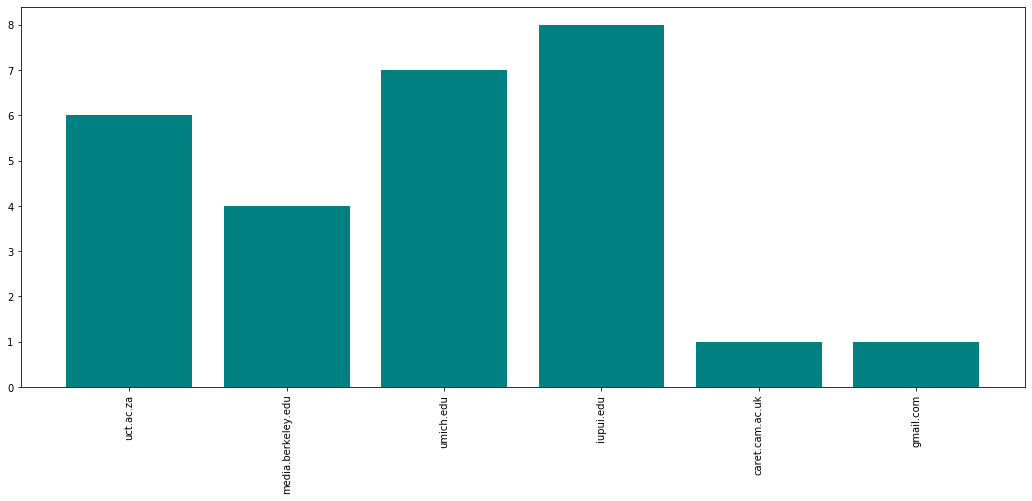

In [17]:
Dom=count_message_from_domain()
plt.figure(figsize=(18,7))
plt.bar(*zip(*Dom.items()),color='teal')
plt.xticks(rotation=90)
plt.show()